#Analysis of Trip Data for CitiBike in NYC and FordGoBike in San Francisco Bay Area for July 2018, what can we learn?

Patty Boonlue  
Thinkful Bootcamp Data Science Program  
March 2018  

## About the Data

The two datasets examined in this capstone are of bike trips history in July 2018 for two different bike-sharing companies, CitiBike and FordGoBike, operating in New York City and San Francisco Bay Area, respectively. The CitiBike dataset were extracted from https://www.citibikenyc.com/system-data. While, the FordGoBike dataset were obtained from https://www.fordgobike.com/system-data. Both datasets contain trip duration (seconds), the start and end time/date, start and end stations, user type (subscriber vs. customer), user's year of birth, and gender. 

The datasets are worthwhile to observe as bike-sharing as become one of the most popular mode of transportation in urban cities as more bicycle infrastructures are put in place to make biking safer, especially in NYC and the San Francisco Bay Area. By analyzing who's riding the bike, especially where they are going, how long they are riding, and during what time, can greatly help not only the companies operating bike-sharing, but also gvoernment entities that are in charge of urban and transportation planning in each jurisdictions. Bike data can help cities be more aware 

## Hypotheses

This capstone explores 3 hypotheses comparing and contrasting bike trips data for CitiBike (NYC) and FordGoBike (Bay Area). Additionally the capstone examines other useful information that can be extracted from the data set. The hypotheses are as followed: 

1. On average, bike trip duration is longer with CitiBike in NYC than FordGoBike in Bay Area. 

2. The percentage of users from each birth year (age distribution of users) is similar between NYC and Bay Area. 

3. The gender split for both cities is 50% male and 50% female.


In [2]:
#First, import basic data science modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###Uploading .csv files into Jupyter Notebook

In [5]:
#Upload FordGoBike data set from the .csv file and replace NAN values with 0
df_ford=pd.read_csv('201807-fordgobike-tripdata.csv')
df_ford=df_ford.fillna(0)

print(df_ford)

        duration_sec                start_time                  end_time  \
0              59989  2018-07-31 18:20:32.7230  2018-08-01 11:00:22.1890   
1              60232  2018-07-31 17:24:26.2350  2018-08-01 10:08:18.7520   
2              43864  2018-07-31 21:03:26.7030  2018-08-01 09:14:30.8340   
3              51522  2018-07-31 18:54:23.7210  2018-08-01 09:13:06.6610   
4              83380  2018-07-31 09:22:29.1000  2018-08-01 08:32:09.2700   
5              49546  2018-07-31 18:44:11.5730  2018-08-01 08:29:57.8380   
6              42799  2018-07-31 19:29:44.6490  2018-08-01 07:23:04.5270   
7              50603  2018-07-31 17:19:23.9830  2018-08-01 07:22:47.6940   
8              54830  2018-07-31 15:44:11.9250  2018-08-01 06:58:01.9580   
9              22051  2018-07-31 22:19:19.4220  2018-08-01 04:26:51.1590   
10             30404  2018-07-31 19:45:33.0670  2018-08-01 04:12:17.6830   
11              1397  2018-07-31 23:54:51.0850  2018-08-01 00:18:08.4710   
12          

In [4]:
#Upload CitiBike data set from the .csv file and replace NAN values with 0.
df_citi=pd.read_csv('201807-citibike-tripdata.csv')
df_citi=df_citi.fillna(0)

print(df_citi)

         tripduration                 starttime                  stoptime  \
0                 500  2018-07-01 00:33:51.2640  2018-07-01 00:42:12.0280   
1                 455  2018-07-01 02:06:54.0270  2018-07-01 02:14:29.0900   
2                1080  2018-07-01 02:09:16.4640  2018-07-01 02:27:17.0290   
3                 632  2018-07-01 02:55:04.5870  2018-07-01 03:05:36.7910   
4                1676  2018-07-01 03:24:27.4350  2018-07-01 03:52:23.7760   
5                1708  2018-07-01 05:26:07.0370  2018-07-01 05:54:35.5530   
6                1582  2018-07-01 07:42:58.0020  2018-07-01 08:09:20.2790   
7                2145  2018-07-01 07:51:58.5010  2018-07-01 08:27:44.1750   
8                1248  2018-07-01 08:12:48.0820  2018-07-01 08:33:36.4490   
9                1578  2018-07-01 08:21:26.6440  2018-07-01 08:47:45.5960   
10               1545  2018-07-01 08:21:47.6610  2018-07-01 08:47:33.6590   
11                265  2018-07-01 08:50:53.1140  2018-07-01 08:55:18.8500   

###Assessing the data sets for Hypothesis 1: Are bike trips longer with CitiBike in NYC than FordGoBike in the Bay Area?

####Describing the Data

In [56]:
#Describing trip duration (in seconds) for FordGoBike in Bay Area

df_ford['duration_sec'].describe()

count    199222.000000
mean        907.710589
std        2499.394774
min          61.000000
25%         353.000000
50%         568.000000
75%         908.000000
max       85389.000000
Name: duration_sec, dtype: float64

In [52]:
#Describing trip duration (in seconds) for CitiBike in NYC 

df_citi['tripduration'].describe()

count    1.913625e+06
mean     1.074544e+03
std      1.533963e+04
min      6.100000e+01
25%      3.810000e+02
50%      6.560000e+02
75%      1.161000e+03
max      4.829587e+06
Name: tripduration, dtype: float64

####Creating Histograms for Data Visualization

Text(0.5, 1.0, 'Length of Trips on CitiBike in NYC')

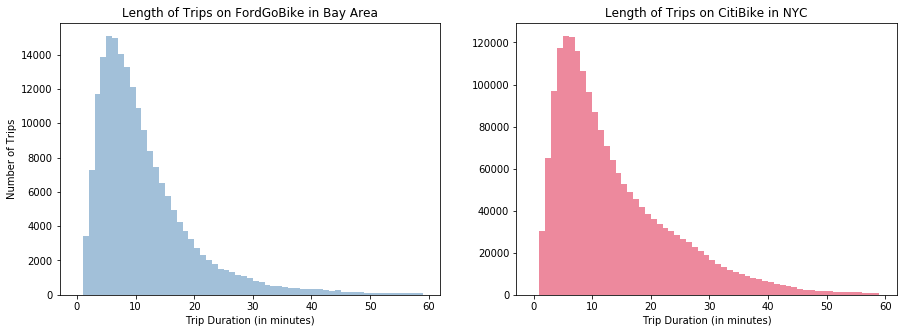

In [6]:
#Generate subplots of histograms for trip duration (in minutes) for both cities to examine distribution
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
x=(df_ford['duration_sec']/60)
plt.hist(x, color='steelblue',bins=np.arange(0,60), alpha=.5, )
plt.xlabel('Trip Duration (in minutes)')
plt.ylabel('Number of Trips')
plt.title('Length of Trips on FordGoBike in Bay Area')

plt.subplot(1,2,2)
y=(df_citi['tripduration']/60)
plt.hist(y, color='crimson', bins=np.arange(0,60), alpha=.5, )
plt.xlabel('Trip Duration (in minutes)')
plt.title('Length of Trips on CitiBike in NYC')


Text(0.5, 1.0, 'Normed Histograms')

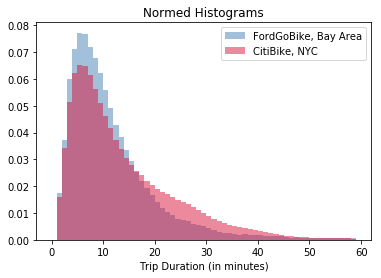

In [55]:
#Generate normalizing histograms for comparison

plt.hist(x,normed=True, color='steelblue',bins=np.arange(0,60), label='FordGoBike, Bay Area', alpha=.5)
plt.hist(y,normed=True, color='crimson', bins=np.arange(0,60),label='CitiBike, NYC', alpha=.5)
plt.xlabel('Trip Duration (in minutes)')
plt.legend(loc='upper right')
plt.title('Normed Histograms')

####Conducting a T-Test & P-Value Calculation for Trip Duration

In [57]:
#Creating a sample of 1,000 from each population
sample_ford=np.random.choice(x,1000,replace=True)
sample_citi=np.random.choice(y,1000, replace=True) 

In [59]:
#Import ttest_ind function from scipy.stats for t-test
from scipy.stats import ttest_ind
print(ttest_ind(sample_citi, sample_ford, equal_var=False))

Ttest_indResult(statistic=0.5164025922184455, pvalue=0.6056572820744788)


####Observations and Results

Just to reiterate, hypothesis #1 assumes that bike trip duration is longer with CitiBike in NYC than FordGoBike in the Bay Area. Therefore, the null hypothesis is that there is no difference in bike trip duration between the two cities. Although the normalized histogram appears to show that there are more FordGoBike trips than CitiBike trips that are between 0 to 20 minutes and more CitiBike trips than FordGoBike trips that are over 20 minutes, the p-value  of the sample set is around 0.606. Because the p-value is greater than 0.05, there is a weak evidence against the null hypothesis, therefore, the null hypothesis can not be rejected. 

###Hypothesis 2: Predicting that the Age Distribution of Users are Similar in NYC and Bay Area

####Describing the Data

In [60]:
#Detailed information on the birth years of users for FordGoBike

df_ford['member_birth_year'].describe()

count    199222.000000
mean       1860.211729
std         479.949078
min           0.000000
25%        1976.000000
50%        1986.000000
75%        1991.000000
max        2000.000000
Name: member_birth_year, dtype: float64

In [61]:
#Detailed information on the birth years of users for CitiBIke

df_citi['birth year'].describe()

count    1.913625e+06
mean     1.979275e+03
std      1.175221e+01
min      1.885000e+03
25%      1.969000e+03
50%      1.982000e+03
75%      1.989000e+03
max      2.002000e+03
Name: birth year, dtype: float64

####Creating Histogram to View Distribution & for Comparison

Text(0.5, 1.0, 'Birth Year of CitiBike Users in NYC')

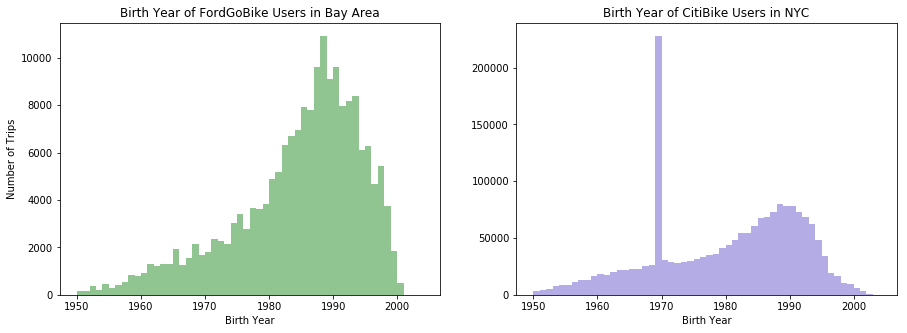

In [72]:
#Generate subplots of histograms for birth years of users in both cities to examine distribution
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
x2=df_ford['member_birth_year']
plt.hist(x2, color='forestgreen',bins=np.arange(1950,2005), alpha=.5, )
plt.xlabel('Birth Year')
plt.ylabel('Number of Trips')
plt.title('Birth Year of FordGoBike Users in Bay Area')

plt.subplot(1,2,2)
y2=df_citi['birth year']
plt.hist(y2, color='slateblue', bins=np.arange(1950,2005), alpha=.5, )
plt.xlabel('Birth Year')
plt.title('Birth Year of CitiBike Users in NYC')

Text(0.5, 1.0, 'Normed Histograms')

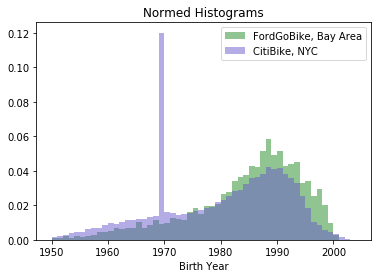

In [73]:
#Generate normalizing histograms for comparison

plt.hist(x2,normed=True, color='forestgreen',bins=np.arange(1950,2005), label='FordGoBike, Bay Area', alpha=.5)
plt.hist(y2,normed=True, color='slateblue', bins=np.arange(1950,2005),label='CitiBike, NYC', alpha=.5)
plt.xlabel('Birth Year')
plt.legend(loc='upper right')
plt.title('Normed Histograms')

Note: It should be addressed that the data for CitiBike shows an unusually high number for users born in 1969. This may be due to the default choice on the mobile application showing 1969 as the birth year. 

In [19]:
#To clean up the data set, users born in 1969 will be remove from both datasets
df_ford_clean=df_ford[df_ford.member_birth_year != 1969.0]
df_citi_clean=df_citi[df_citi['birth year'] != 1969]

Text(0.5, 1.0, 'Normed Histograms without Users Born in 1969')

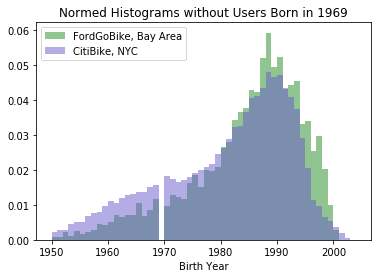

In [23]:
#Creating another normalized histogram without users born in 1969
x3=df_ford_clean['member_birth_year']
y3=df_citi_clean['birth year']

plt.hist(x3,normed=True, color='forestgreen',bins=np.arange(1950,2005), label='FordGoBike, Bay Area', alpha=.5)
plt.hist(y3,normed=True, color='slateblue', bins=np.arange(1950,2005),label='CitiBike, NYC', alpha=.5)
plt.xlabel('Birth Year')
plt.legend(loc='upper left')
plt.title('Normed Histograms without Users Born in 1969')

####Conducting a T-Test & P-Value Calculation for Birth Year 

In [24]:
#Creating a sample of 1,000 from each population
sample_ford2=np.random.choice(x3,1000,replace=True)
sample_citi2=np.random.choice(y3,1000, replace=True) 

In [25]:
#Import ttest_ind function from scipy.stats for t-test
from scipy.stats import ttest_ind
print(ttest_ind(sample_citi2, sample_ford2, equal_var=False))

Ttest_indResult(statistic=7.835996916552605, pvalue=1.184831453898668e-14)


####Observation and Results

Note that hypothesis #2 states that the age distribution of FordGoBike users and CitiBike users are the same. In contrast, the null hypothesis is that the percentage of users from each birth year is NOT similar in the two cities. Because there was an unusually high number of users born in 1969 for CitiBike, possibly due to the default setting on the phone application, users born in 1969 were taken out from both datasets. 

In the normalized historgram, it looks like more CitiBike users than FordGoBike users are born between 1950 to around 1975. Conversely, more FordGoBike users than CitiBike users are born between 1980 to 2000. As a result of the analysis, CitiBike users tend to be older than FordGoBike users. This result is unexpected as hypothesis #2 predicted a similar age distribution in both cities. The p-value calculated through the t-test for the datasets is 1.18 * 10^(-14). Because the p-value is so low (lower than 0.05), we can reject the null hypothesis and conclude that there is a statistically significant difference between the two data set. 


###Examining hypothesis #3: Are half of the bike users male and the other half female in both NYC an the Bay Area?

In [100]:
#Calculating the percentage of male vs. female users for CitiBike in NYC
#Need to convert value 1 to male and value 2 to female; a value of 0 is not recorded
replacements = {'1': 'Male', '2': 'Female','0': 'Not Recorded'}
df_citi['gender'].replace(replacements, inplace=True)
df_citi['gender'].value_counts(normalize=True)*100

Male            64.931530
Female          24.052727
Not Recorded    11.015742
Name: gender, dtype: float64

In [95]:
#Calculating the percentage of male vs. female users for FordGoBike in Bay Area
df_ford['member_gender'].value_counts(normalize=True)*100

Male      68.019596
Female    24.201142
0          6.219193
Other      1.560069
Name: member_gender, dtype: float64

Text(0.5, 1.0, 'Male vs Female Users for CitiBike in NYC')

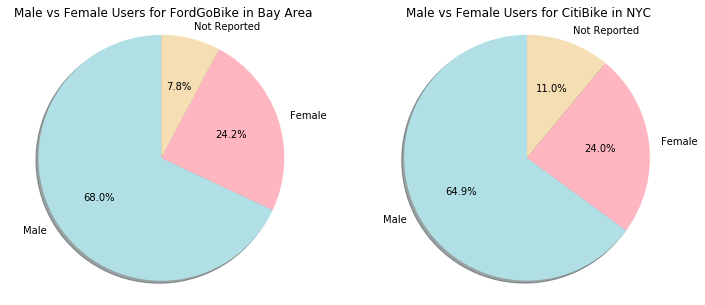

In [47]:
#Plotting the gender percentage in pie charts for CitiBike and FordGoBike
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
labels='Male','Female', 'Not Reported'
sizes=[68.02, 24.20, 7.78]
colors=['powderblue','lightpink','wheat']
plt.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Male vs Female Users for FordGoBike in Bay Area')

plt.subplot(1,2,2)
labels='Male','Female', 'Not Reported'
sizes=[64.93, 24.05, 11.02]
colors=['powderblue','lightpink','wheat']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Male vs Female Users for CitiBike in NYC')


####Observation and Results

Hypothesis #3 can be rejected as the percentage of male users almost triple of female users in both cities. Possible reasons for this discrepancy can include bikes are too high or too heavy for many female users and marketing campaign not geared towards woman.

###Additional Useful Information Extracted from Data Sets

####Percentage of User Type (Customer vs. Subscriber) in Both Cities

In [41]:
#Calculating percentage for each user type for FordGoBike in Bay Area
df_ford['user_type'].value_counts(normalize=True)*100

Subscriber    82.944153
Customer      17.055847
Name: user_type, dtype: float64

In [44]:
#Calculating percentage for each user type for CitiBike in New York City
df_citi['usertype'].value_counts(normalize=True)*100

Subscriber    85.113123
Customer      14.886877
Name: usertype, dtype: float64

Text(0.5, 1.0, 'User Types with CitiBike in NYC')

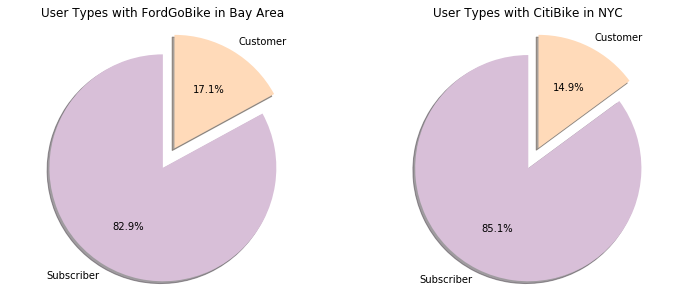

In [62]:
#Plotting the user type percentage in pie charts for CitiBike and FordGoBike
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
labels='Subscriber','Customer'
sizes=[82.94,17.06]
colors=['thistle','peachpuff']
explode=[0.1,0.1]
plt.pie(sizes, labels=labels,explode=explode,colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('User Types with FordGoBike in Bay Area')

plt.subplot(1,2,2)
labels='Subscriber','Customer'
sizes=[85.11,14.89]
colors=['thistle','peachpuff']
explode=[0.1,0.1]
plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('User Types with CitiBike in NYC')

The two companies have a similar percentage of subscriber, 82.9% and 85.1% for FordGoBike and CitiBike, respectively. According to CitiBike's website, a user is considered a subscriber if they purchase an annual membership. A customer is a user who either purchased a 24-hour pass or a 3-day pass. This information is extremely crucial to the bike-sharing companies as this may correlate to customer retention and effective marketing strategies. 

####The Start Time of Bike Trips Taken in Bay Area and NYC

In [70]:
#Checking the data type for the start time column of FordGoBike in Bay Area
import datetime
type(df_ford['start_time'])

pandas.core.series.Series

In [74]:
#Since it is a Series, can access the hour using the following code and creating a new column.
df_ford["start_time"] = pd.to_datetime(df_ford["start_time"])
df_ford['hour_only']=df_ford['start_time'].dt.hour

In [78]:
#Printing out the new column ('hour_only') to make sure the code is executed properly.
print(df_ford['hour_only'])

0         18
1         17
2         21
3         18
4          9
5         18
6         19
7         17
8         15
9         22
10        19
11        23
12        23
13        23
14        22
15        22
16        23
17        23
18        23
19        23
20        23
21        23
22        23
23        23
24        23
25        23
26        23
27        23
28        23
29        23
          ..
199192     0
199193     0
199194     0
199195     0
199196     0
199197     0
199198     0
199199     0
199200     0
199201     0
199202     0
199203     0
199204     0
199205     0
199206     0
199207     0
199208     0
199209     0
199210     0
199211     0
199212     0
199213     0
199214     0
199215     0
199216     0
199217     0
199218     0
199219     0
199220     0
199221     0
Name: hour_only, Length: 199222, dtype: int64


In [85]:
#Grouping the start hours for FordGoBike into four 6-hours intervals: 1
#2 am to 6 am, 6 am to 12 pm, 12 pm to 6 pm, and 6 pm to 11:59 pm
bins=pd.cut(df_ford['hour_only'], [0,6,12,18,24])
df_ford.groupby(bins)['hour_only'].agg(['count'])

,count
hour_only,
"(0, 6]",6476
"(6, 12]",75073
"(12, 18]",85544
"(18, 24]",31109


In [86]:
#Do the same for CitiBike, creating a new column with just the start hour value.
df_citi["starttime"] = pd.to_datetime(df_citi["starttime"])
df_citi['hour_only']=df_citi['starttime'].dt.hour

In [88]:
#Grouping the start hours for CitiBike into four 6-hours intervals: 1
#2 am to 6 am, 6 am to 12 pm, 12 pm to 6 pm, and 6 pm to 11:59 pm
bins=pd.cut(df_citi['hour_only'], [0,6,12,18,24])
df_citi.groupby(bins)['hour_only'].agg(['count'])

,count
hour_only,
"(0, 6]",75017
"(6, 12]",609486
"(12, 18]",830415
"(18, 24]",380107


Text(0.5, 1.0, 'Start Time of Trips on CitiBike')

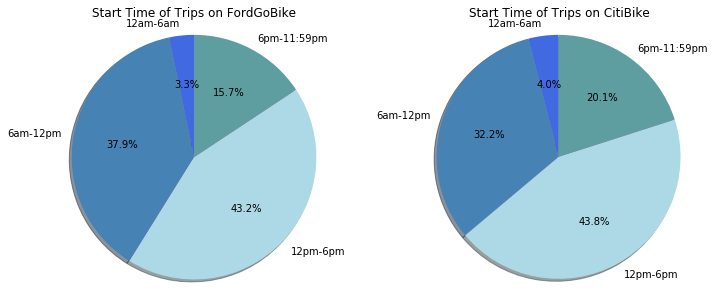

In [95]:
#Creating a pie chart of start hours
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
labels='12am-6am','6am-12pm','12pm-6pm','6pm-11:59pm'
sizes=[6476,75073,85544,31109]
colors=['royalblue','steelblue','lightblue','cadetblue']
plt.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Start Time of Trips on FordGoBike in Bay Area')

plt.subplot(1,2,2)
labels='12am-6am','6am-12pm','12pm-6pm','6pm-11:59pm'
sizes=[75017,609486,830415,380107]
colors=['royalblue','steelblue','lightblue','cadetblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Start Time of Trips on CitiBike in NYC')

The data shown in the pie charts are what would be expected when considering human activities throughout the day. The majority of bike usage occurs between 6 am to 6 pm, this is a trend that can be observed with both FordGoBike and CitiBike. This makes sense as most individuals are out and about during this time period, whether it would be heading to school, commuting to work, running errands, or leisurely enjoying a bike ride, etc. The least usage is between 12 am to 6 am, which is expected as issues of poor lighting and safety can be concerns for bike users. This information can be useful to CitiBIke and FordGoBike to know when peak usage occurs and make sure there is enough staff to redistribute the bikes at popular stations to avoid bike shortage.

###Propose Further Research

Further research on these data sets can include producing heat maps of bike stations, origins-destinations maps of bike trips, and graduated symbol maps with popular start and stop locations. It will also be important to see whether bike stations are located in areas that can connect users to other modes of transportation, such as light rail, transit centers, bus stops, heavy rail stations, subway stations, ferry terminals, etc. Bike sharing can be a great solution for first-mile and last-mile problem in urban cities, especially in New York City and the San Francisco Bay Area. Information obtained through analysis of these data sets can be useful to not only FordGoBike and CitiBike operators, but also of significance to public agencies. Many cities are ramping up their bicycle infrastructure to make it safer to bike within their jurisdictions as a way to try to reduce traffic congestion. If public agencies can determine where bicycle infrastructures (protected bike lanes, buffered bike lanes, painted bike lanes)are needed, it can beneficial for all the stakeholders involved. In closing, the information extracted from these datasets have the potential to save lives. FordGoBike and the City of San Francisco was in the news earlier this month on March 8th, 2019 (https://www.sfexaminer.com/news/woman-struck-and-killed-while-riding-a-ford-gobike-in-south-of-market-neighborhood/) when a car struck a bicyclist riding on FordGoBike in South of Market Neighborhood in the city. This is a hot issue as citizens calls for more bicycle infrastructures to make it safer for bicyclist, especially with the rise in bike-sharing. 

Note: First-mile and last-mile problem often refers to passenger travel in the context of getting to/from bus and rail stops. For example, passengers must first walk, bike, or drive themselves to and from the nearest station (LA Metro https://www.metro.net/projects/first-last/).

